<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Inclass - Lab File 1 <br>(Week 1 - Day 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams 
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 10,6

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:
# load the csv file

# type your code here

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
df = pd.read_csv('Life_Expectancy.csv')
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


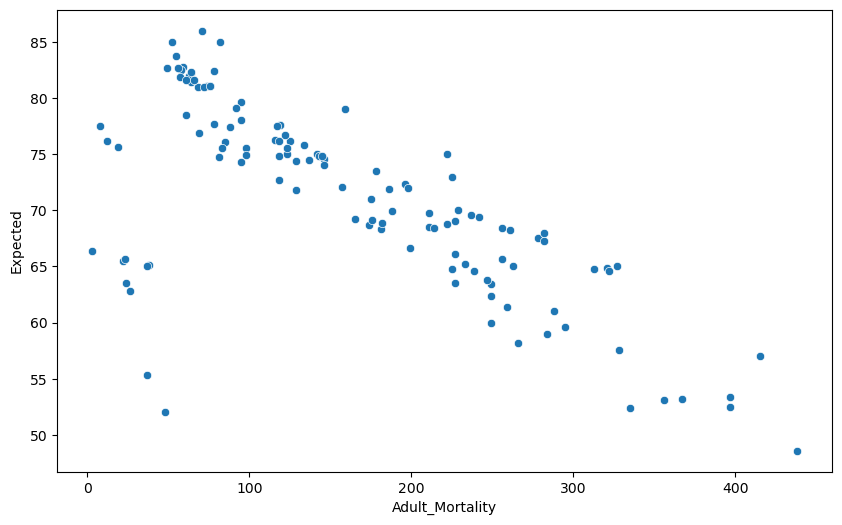

In [4]:
sns.scatterplot(x = df['Adult_Mortality'], y = df['Expected']);

In [5]:
df['Adult_Mortality'].corr(df['Expected'])

-0.7108678534954708

In [6]:
#high correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here

In [8]:
df.isnull().sum()

Country               0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

0.8431637165615422


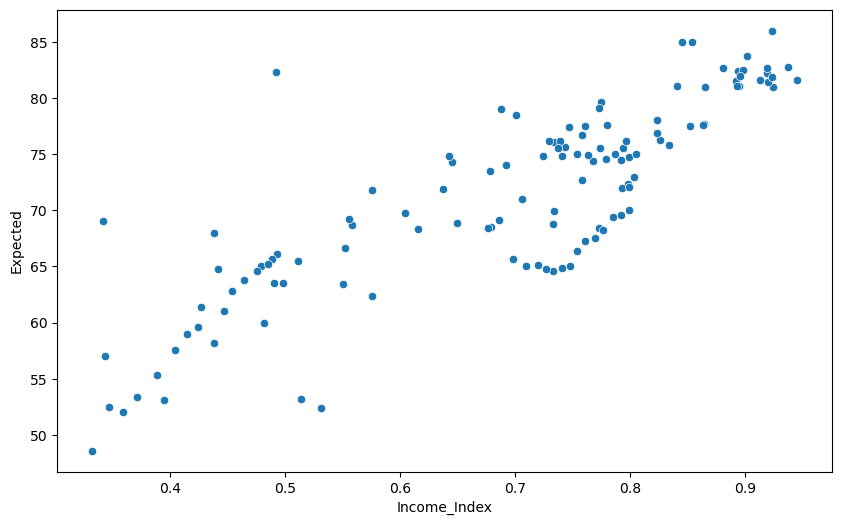

In [9]:
sns.scatterplot(x = df['Income_Index'],y = df['Expected']);
print(df['Income_Index'].corr(df['Expected']))

In [10]:
from sklearn.model_selection import train_test_split
X = df[['Income_Index']]
y = df['Expected']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=23)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
model_reg = lr.fit(xtrain,ytrain)
pred = model_reg.predict(xtest)

print("RMSE: ",np.sqrt(mean_squared_error(ytest,pred)))

RMSE:  5.79339113809037


In [11]:
# deviation of 5 years is seen

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here

In [13]:
from sklearn.model_selection import train_test_split
X = df[['Hepatitis ','Polio','Diphtheria ']]
y = df['Expected']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=23)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
model_reg = lr.fit(xtrain,ytrain)
pred = model_reg.predict(xtest)

print("RMSE: ",np.sqrt(mean_squared_error(ytest,pred)))

RMSE:  10.88314114570264


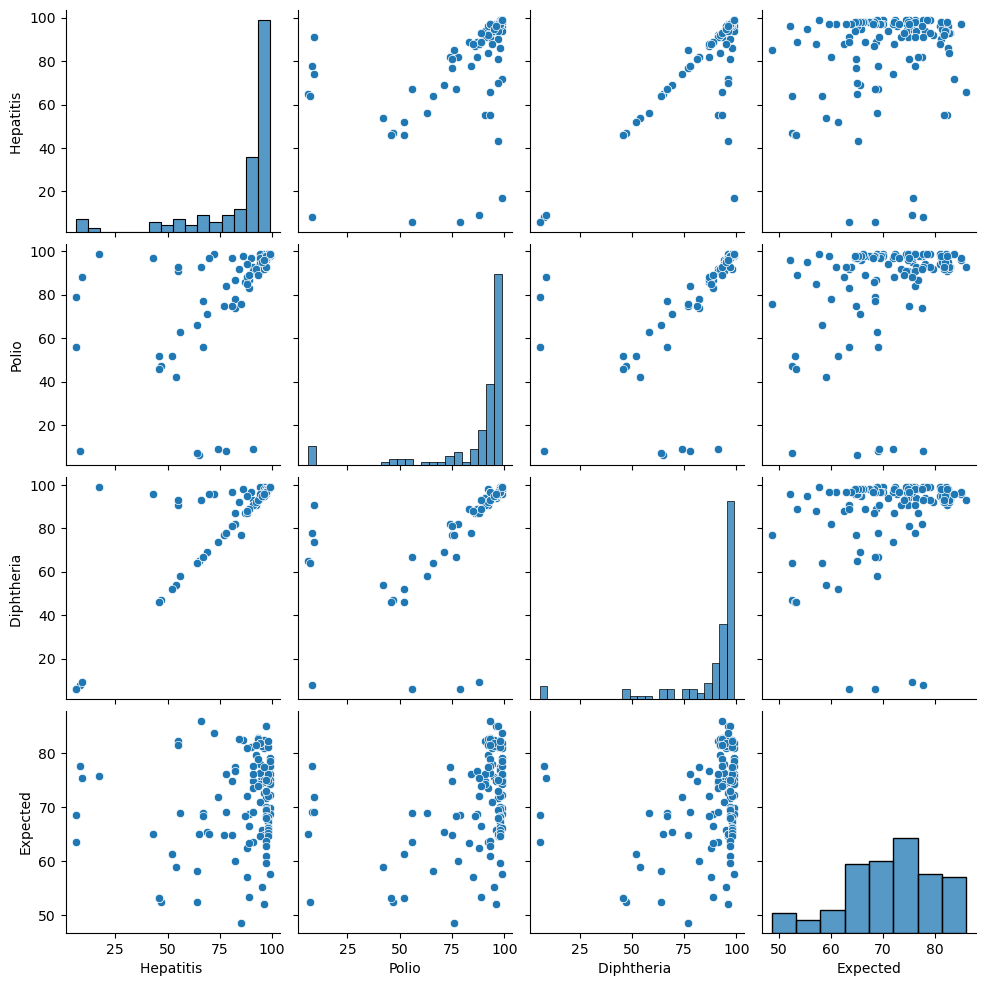

In [14]:
df_immu = df[['Hepatitis ','Polio','Diphtheria ','Expected']]
sns.pairplot(df_immu)

In [15]:
# no correlation
# multicolineanirity is present

In [16]:
df[['Hepatitis ','Polio','Diphtheria ','Expected']].corr()

,Hepatitis,Polio,Diphtheria,Expected
Hepatitis,1.000000,0.528549,0.861083,0.181308
Polio,0.528549,1.000000,0.642188,0.331566
Diphtheria,0.861083,0.642188,1.000000,0.293787
Expected,0.181308,0.331566,0.293787,1.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

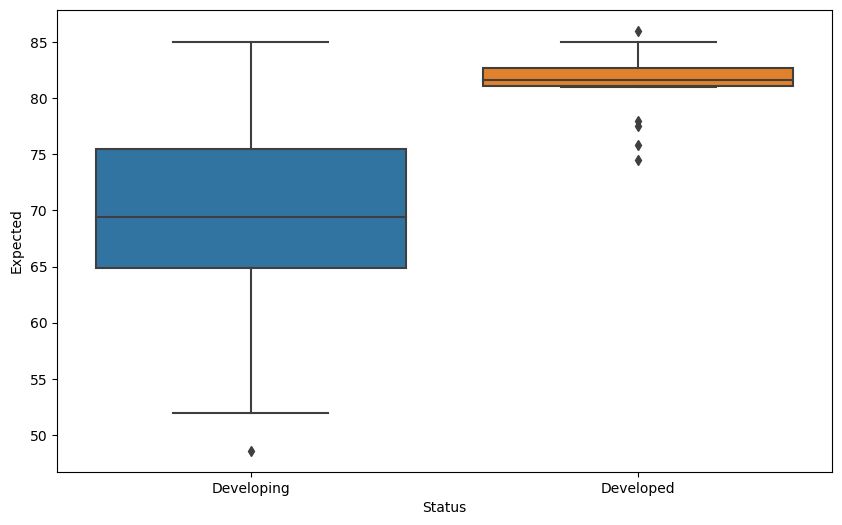

In [17]:
# type your code here
from sklearn.model_selection import train_test_split
sns.boxplot(x = df['Status'], y = df['Expected']);

In [18]:
#yes status of country have an impact on dependent variable

In [19]:
from sklearn.model_selection import train_test_split
X = df[['Hepatitis ','Polio','Diphtheria ']]
y = df['Expected']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=23)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
model_reg = lr.fit(xtrain,ytrain)
pred = model_reg.predict(xtest)

print("RMSE: ",np.sqrt(mean_squared_error(ytest,pred)))

RMSE:  10.88314114570264


In [20]:
X = df[['Hepatitis ','Polio','Diphtheria ']]
temp = df['Status'].replace({'Developing':1,'Developed':0})
X['Status'] = temp
y = df['Expected']


xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=23)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
model_reg = lr.fit(xtrain,ytrain)
pred = model_reg.predict(xtest)

print("RMSE: ",np.sqrt(mean_squared_error(ytest,pred)))

RMSE:  10.130536996446612


In [21]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [22]:
import statsmodels.api as sm

In [23]:
X = df[['Hepatitis ','Polio','Diphtheria ']]
y = df['Expected']
temp_x = sm.add_constant(X)

MLR_model = sm.OLS(y,temp_x).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           0.000468
Time:                        11:30:23   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here

In [25]:
df.isnull().sum().sum()

0

In [26]:
#no missing values

In [27]:
X = df.drop(['Country','Expected'],axis = 1)
y = df.Expected

X = pd.get_dummies(X,drop_first=True)

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

import statsmodels.api as sma

t_xtrain = sma.add_constant(xtrain)
t_xtest = sma.add_constant(xtest)

model = sma.OLS(ytrain,t_xtrain).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     31.36
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.95e-28
Time:                        11:30:24   Log-Likelihood:                -258.01
No. Observations:                  99   AIC:                             550.0
Df Residuals:                      82   BIC:                             594.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.3498      4.549     12.387      0.000      47.300      65.399
Adult_Mortality       -0.0201      0.005     -4.455      0.000      -0.029      -0.011
Infant_Deaths          0.0556      0.041      1.367      0.175      -0.025       0.137
Hepatitis              0.0956      0.045      2.128      0.036       0.006       0.185
Measles            -8.016e-05   6.33e-05     -1.266      0.209      -0.000    4.58e-05
 BMI                  -0.0263      0.026     -1.018      0.312      -0.078       0.025
Underfive_Deaths      -0.0363      0.030     -1.214      0.228      -0.096       0.023
Polio                 -0.0253      0.026     -0.990      0.325      -0.076       0.026
Diphtheria            -0.0210      0.056     -0.374      0.709      -0.132       0.091
 HIV                  -0.9393      0.300     -3.131      0.002      -1.536      -0.343
GDP                  3.89e-05   4.05e-05      0.960      0.340   -4.17e-05       0.000
Population         -2.094e-08      1e-08     -2.094      0.039   -4.08e-08   -1.04e-09
Malnourished10_19     -0.6975      0.326     -2.140      0.035      -1.346      -0.049
Malnourished5_9        0.4712      0.310      1.522      0.132      -0.145       1.087
Income_Index          25.9173      7.411      3.497      0.001      11.173      40.661
Schooling              0.0570      0.387      0.147      0.883      -0.713       0.828
Status_Developing     -2.2625      1.312     -1.725      0.088      -4.872       0.347
==============================================================================
Omnibus:                        4.809   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.998
Skew:                          -0.157   Prob(JB):                       0.0498
Kurtosis:                       4.164   Cond. No.                     9.49e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model.pvalues

const                 1.792376e-20
Adult_Mortality       2.635304e-05
Infant_Deaths         1.753514e-01
Hepatitis             3.630429e-02
Measles               2.090887e-01
 BMI                  3.118413e-01
Underfive_Deaths      2.281349e-01
Polio                 3.252626e-01
Diphtheria            7.091890e-01
 HIV                  2.410841e-03
GDP                   3.400477e-01
Population            3.937391e-02
Malnourished10_19     3.533897e-02
Malnourished5_9       1.319560e-01
Income_Index          7.627955e-04
Schooling             8.832691e-01
Status_Developing     8.833302e-02
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here

In [30]:
import statsmodels.api as sma

In [31]:
X = df[['GDP', 'Income_Index']]
temp_x = sma.add_constant(X)
y = df['Expected']

model = sma.OLS(y,temp_x).fit()

pred = model.predict(temp_x)

SSE = np.sum((y-pred) ** 2)
SSR = model.ssr
SST = SSR+SSE

print("total variationL", SST)

total variationL 5054.467759742271


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here

In [33]:
import statsmodels.api as sma

X = df['Income_Index']
temp_x = sma.add_constant(X)
y = df['Expected']

model = sma.OLS(y,temp_x).fit()
# model.summary()
model.conf_int()

,0,1
const,38.473158,45.365105
Income_Index,37.575806,47.272760


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here

In [35]:
X = df['Adult_Mortality']
temp_x = sma.add_constant(X)
y = df['Expected']

model = sma.OLS(y,temp_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.27e-20
Time:                        11:30:24   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = df[['Adult_Mortality','Population']]
temp_x = sma.add_constant(X)
y = df['Expected']

model = sma.OLS(y,temp_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     62.12
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.74e-19
Time:                        11:30:24   Log-Likelihood:                -396.54
No. Observations:                 124   AIC:                             799.1
Df Residuals:                     121   BIC:                             807.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.6129      1.023     78.783      0.000      78.587      82.639
Adult_Mortality    -0.0594      0.005    -11.133      0.000      -0.070      -0.049
Population       7.436e-09   1.33e-08      0.561      0.576   -1.88e-08    3.37e-08
==============================================================================
Omnibus:                       57.763   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.344
Skew:                          -1.826   Prob(JB):                     9.22e-36
Kurtosis:                       7.231   Cond. No.                     8.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#not much difference in rsq and adj r-sq, so no significant better prediciton

In [38]:
#another method

import statsmodels.formula.api as sfa
model_adm = sfa.ols('Expected~Adult_Mortality', data = df).fit()
model_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.27e-20
Time:                        11:30:24   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here

In [40]:
import statsmodels.api as sma

X = df.drop(['Country','Expected'], axis = 1)
temp_x = pd.get_dummies(X,drop_first=True)
y = df['Expected']

xtrain,xtest,ytrain,ytest = train_test_split(temp_x, y, test_size=0.2, random_state=0)

t_xtrain = sma.add_constant(xtrain)
t_xtest = sma.add_constant(xtest)


model = sma.OLS(ytrain,t_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     31.36
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.95e-28
Time:                        11:30:24   Log-Likelihood:                -258.01
No. Observations:                  99   AIC:                             550.0
Df Residuals:                      82   BIC:                             594.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.3498      4.549     12.387      0.000      47.300      65.399
Adult_Mortality       -0.0201      0.005     -4.455      0.000      -0.029      -0.011
Infant_Deaths          0.0556      0.041      1.367      0.175      -0.025       0.137
Hepatitis              0.0956      0.045      2.128      0.036       0.006       0.185
Measles            -8.016e-05   6.33e-05     -1.266      0.209      -0.000    4.58e-05
 BMI                  -0.0263      0.026     -1.018      0.312      -0.078       0.025
Underfive_Deaths      -0.0363      0.030     -1.214      0.228      -0.096       0.023
Polio                 -0.0253      0.026     -0.990      0.325      -0.076       0.026
Diphtheria            -0.0210      0.056     -0.374      0.709      -0.132       0.091
 HIV                  -0.9393      0.300     -3.131      0.002      -1.536      -0.343
GDP                  3.89e-05   4.05e-05      0.960      0.340   -4.17e-05       0.000
Population         -2.094e-08      1e-08     -2.094      0.039   -4.08e-08   -1.04e-09
Malnourished10_19     -0.6975      0.326     -2.140      0.035      -1.346      -0.049
Malnourished5_9        0.4712      0.310      1.522      0.132      -0.145       1.087
Income_Index          25.9173      7.411      3.497      0.001      11.173      40.661
Schooling              0.0570      0.387      0.147      0.883      -0.713       0.828
Status_Developing     -2.2625      1.312     -1.725      0.088      -4.872       0.347
==============================================================================
Omnibus:                        4.809   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.998
Skew:                          -0.157   Prob(JB):                       0.0498
Kurtosis:                       4.164   Cond. No.                     9.49e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
df.head(1)

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,65.0


<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here
# ho : data is normal
# h1 : data is not normal

In [43]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9773083329200745, pvalue=0.08481799811124802)

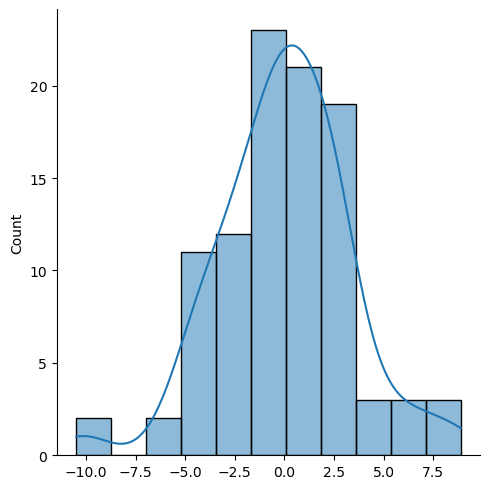

In [44]:
sns.displot(model.resid, kde = True);

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
import statsmodels.api as sma

X = df.drop(['Country','Expected'], axis = 1)
temp_x = pd.get_dummies(X,drop_first=True)
y = df['Expected']

xtrain,xtest,ytrain,ytest = train_test_split(temp_x, y, test_size=0.2, random_state=0)

# t_xtrain = sma.add_constant(xtrain)
# t_xtest = sma.add_constant(xtest)


model = sma.OLS(ytrain,xtrain).fit()
model.rsquared

0.9939668081443477

In [47]:
import statsmodels.api as sma

X = df.drop(['Country','Expected'], axis = 1)
temp_x = pd.get_dummies(X,drop_first=True)
y = df['Expected']

xtrain,xtest,ytrain,ytest = train_test_split(temp_x, y, test_size=0.2, random_state=0)

t_xtrain = sma.add_constant(xtrain)
t_xtest = sma.add_constant(xtest)


model = sma.OLS(ytrain,t_xtrain).fit()
model.rsquared

0.8595295568502719

In [48]:
#big differencein rsq values


### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [49]:
# load the csv file
# type your code here
df = pd.read_csv('LungCapdata.csv')
df.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

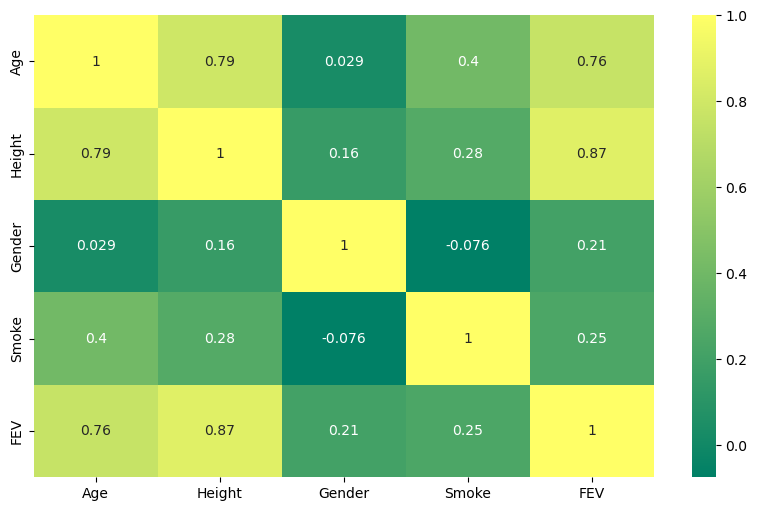

In [50]:
# type your code here
sns.heatmap(df.corr(), annot = True, cmap = 'summer')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
X = df.drop('FEV', axis = 1)

In [53]:
vif_list = []
for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values, i))
    
pd.DataFrame({'Features':X.columns, 'VIF':vif_list}).sort_values(by = 'VIF',ascending = False)

,Features,VIF
1,Height,24.524524
0,Age,24.322098
2,Gender,2.130851
3,Smoke,1.342164


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here

In [55]:
X = df.drop("FEV", axis = 1)
y = df.FEV

X = pd.get_dummies(X,drop_first=True)

temp_x = sma.add_constant(X)
model = sma.OLS(y,temp_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          9.10e-209
Time:                        11:30:27   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# r-sq value and adj a-sq values are not same, so there exist some insignificant variable

#### Rainbow test

In [57]:
sma.stats.linear_rainbow(model)

(0.977786867755421, 0.5802195276905311)

#### JB Test

In [58]:
stats.jarque_bera(model.resid)

SignificanceResult(statistic=43.27059387205179, pvalue=4.017074871702554e-10)

#### BreuschPagan Test

In [59]:
import statsmodels.stats.api as rsa
rsa.het_breuschpagan(model.resid, model.model.exog)

(64.76040950230293,
 2.89031215942461e-13,
 17.832095146345605,
 6.683509343867702e-14)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
# type your code here

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.645201585591555

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
stats.jarque_bera(model.resid)
# type your code here

SignificanceResult(statistic=43.27059387205179, pvalue=4.017074871702554e-10)

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
from sklearn.linear_model import LinearRegression
df = pd.read_csv('LungCapdata.csv')

X = df.drop('FEV', axis = 1)
y = df.FEV

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3, random_state=0)

lr = LinearRegression()
model = lr.fit(xtrain, ytrain)

pred = model.predict(xtest)

mse = mean_squared_error(ytest, pred)
rmse = mean_squared_error(ytest, pred, squared=False)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.15987820475446501
Root Mean Squared Error: 0.3998477269592326


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here

In [68]:
# type your code here
import statsmodels.api as sma
X = df.drop('FEV', axis = 1)
y = df.FEV

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=0)

t_xtrain = sma.add_constant(xtrain)
t_xtest = sma.add_constant(xtest)

model = sma.OLS(ytrain, xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    FEV   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              3435.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):                        0.00
Time:                        11:31:40   Log-Likelihood:                         -410.14
No. Observations:                 523   AIC:                                      828.3
Df Residuals:                     519   BIC:                                      845.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.1736      0.011     15.812      0.000       0.152       0.195
Height         0.0136      0.002      7.329      0.000       0.010       0.017
Gender         0.2208      0.047      4.655      0.000       0.128       0.314
Smoke         -0.0988      0.085     -1.161      0.246      -0.266       0.068
==============================================================================
Omnibus:                       33.092   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.099
Skew:                           0.584   Prob(JB):                     3.23e-09
Kurtosis:                       3.655   Cond. No.                         229.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#yes overfitted

In [67]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data = df

# Split the data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Select features and target
X_train = train_data.drop("FEV", axis=1)
y_train = train_data["FEV"]
X_test = test_data.drop("FEV", axis=1)
y_test = test_data["FEV"]

# Add a constant term to the features
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create and train the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Get the model summary
print(model.summary())

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     363.2
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          1.16e-139
Time:                        11:31:04   Log-Likelihood:                -249.64
No. Observations:                 457   AIC:                             509.3
Df Residuals:                     452   BIC:                             529.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4204      0.275    -16.098      0.0